In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('spotify-2023.csv',encoding='unicode_escape')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
data.isnull().mean()*100

track_name              0.00000
artist(s)_name          0.00000
artist_count            0.00000
released_year           0.00000
released_month          0.00000
released_day            0.00000
in_spotify_playlists    0.00000
in_spotify_charts       0.00000
streams                 0.00000
in_apple_playlists      0.00000
in_apple_charts         0.00000
in_deezer_playlists     0.00000
in_deezer_charts        0.00000
in_shazam_charts        5.24659
bpm                     0.00000
key                     9.96852
mode                    0.00000
danceability_%          0.00000
valence_%               0.00000
energy_%                0.00000
acousticness_%          0.00000
instrumentalness_%      0.00000
liveness_%              0.00000
speechiness_%           0.00000
dtype: float64

In [5]:
data['key'] = data['key'].fillna('No Record') # Los keys vacios los reemplazo por 'No Record'

In [6]:
data[data['track_name'].duplicated(keep=False)]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,118,No Record,Major,71,65,68,6,0,3,7
13,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,130,D,Minor,51,32,43,83,0,9,3
47,Die For You,The Weeknd,1,2016,11,24,2483,59,1647990401,68,...,134,C#,Minor,59,51,52,9,0,15,7
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468,148,...,170,No Record,Major,56,53,64,11,0,45,6
331,Numb,Linkin Park,1,2003,3,24,20111,5,1361425037,39,...,110,A,Major,50,24,86,0,0,64,4
335,Miss You,"Robin Schulz, Oliver Tree",2,2022,8,5,5730,10,497225336,108,...,145,F#,Minor,59,20,74,1,0,15,5
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294,32,...,94,G#,Major,73,65,79,5,2,11,6
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
417,Die For You,Joji,1,2022,11,4,1703,0,246390068,38,...,148,G#,Major,47,15,52,38,13,29,5
448,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,1,1959,11,16,6512,0,446390129,88,...,134,C#,Major,45,72,24,91,0,18,4


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


Text(0.5, 1.0, 'Cantidad de canciones por mes de lanzamiento')

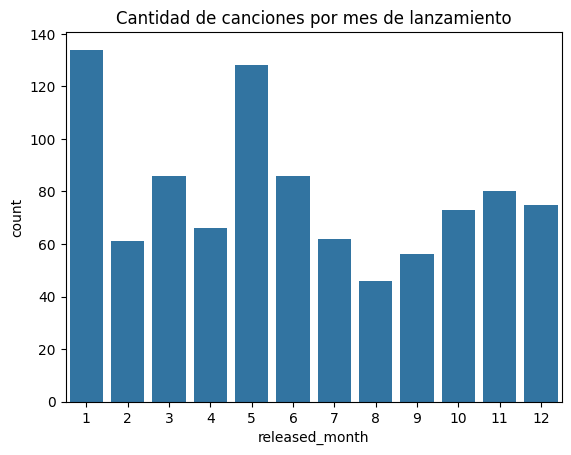

In [8]:
sns.countplot(data=data,x="released_month")
plt.title('Cantidad de canciones por mes de lanzamiento')

C:\Users\rrobe\AppData\Local\Temp\ipykernel_15992\223694799.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_nsong10.values,y=artist_nsong10.index,palette='viridis')


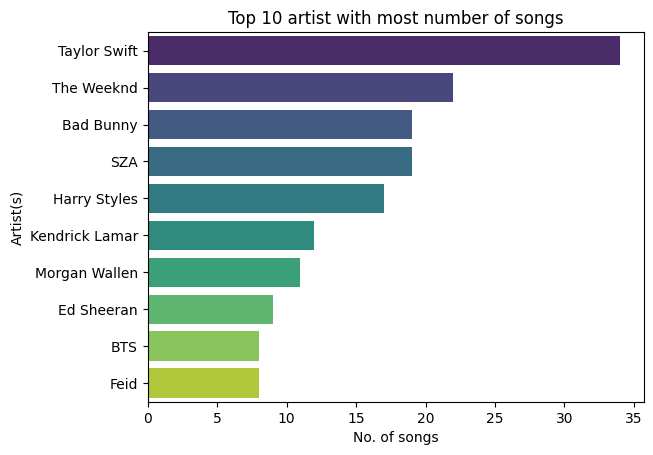

In [9]:
artist_nsong = data['artist(s)_name'].value_counts()
artist_nsong10 = artist_nsong[:10]

sns.barplot(x=artist_nsong10.values,y=artist_nsong10.index,palette='viridis')
plt.xlabel('No. of songs')
plt.ylabel('Artist(s)')
plt.title('Top 10 artist with most number of songs')
plt.show;

In [10]:
song_streamh = data[['track_name','artist(s)_name','released_year','streams']].\
               sort_values(by = 'streams',ascending=False)

song_streamh10 = song_streamh[:10]



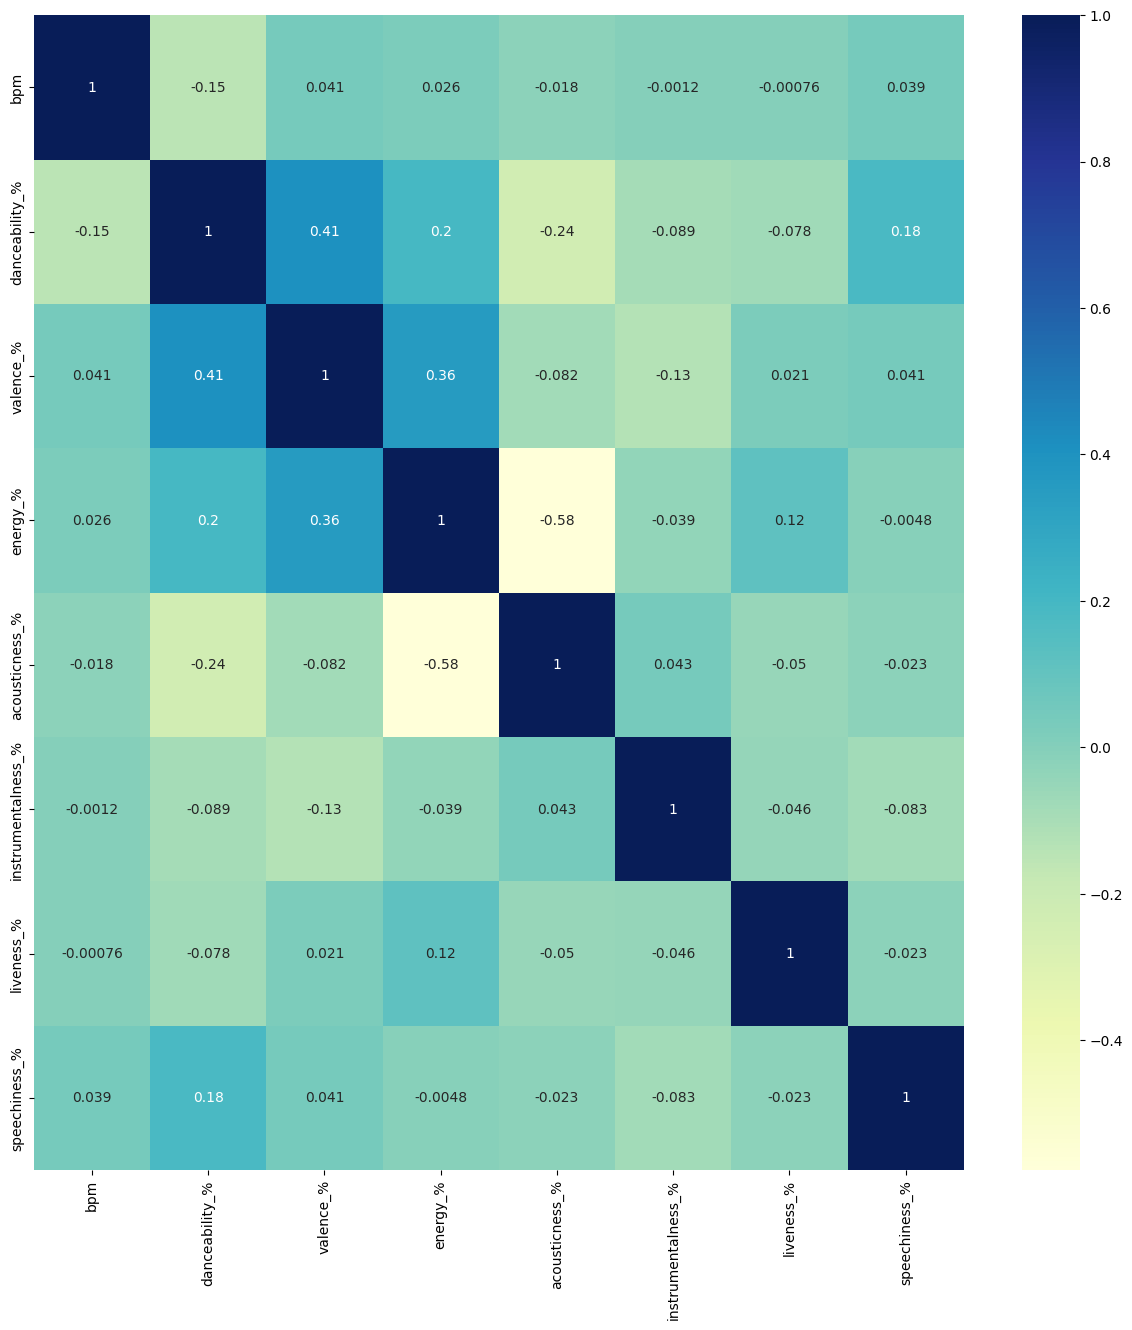

In [11]:
df_clean = data.drop(["track_name", "artist(s)_name", "key", "mode","artist_count", "released_year", "released_month", "released_day","in_spotify_playlists","in_spotify_charts","streams","in_apple_playlists","in_apple_charts","in_deezer_playlists","in_deezer_charts","in_shazam_charts"], axis=1)
df_clean = df_clean.dropna()
for col in df_clean.columns:
    df_clean = df_clean[pd.to_numeric(df_clean[col], errors='coerce').notnull()]

plt.figure(figsize=(15,15))
dataplot = sns.heatmap(df_clean.corr(), cmap="YlGnBu", annot=True)
plt.show()

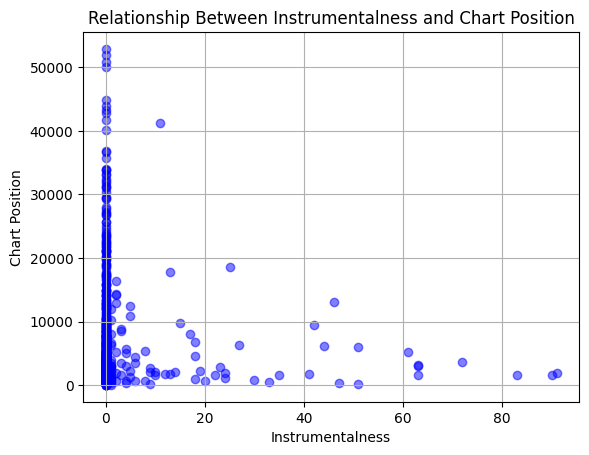

In [12]:
instrumentalness_data = data['instrumentalness_%']
chart_positions_data = data['in_spotify_playlists']

# Create the scatterplot

plt.scatter(instrumentalness_data, chart_positions_data, alpha=0.5, c='blue')
plt.xlabel('Instrumentalness')
plt.ylabel('Chart Position')
plt.title('Relationship Between Instrumentalness and Chart Position')
plt.grid(True)

plt.show()

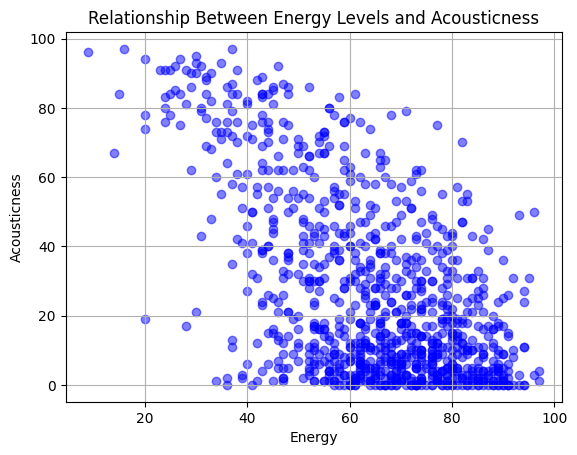

In [13]:
spotify_data_filtered = data.dropna(subset=['energy_%', 'acousticness_%'])

# Assuming 'energy_' and 'acousticness_' are on a scale from 0 to 1
energy_data = data['energy_%']
acousticness_data = data['acousticness_%']

plt.scatter(energy_data, acousticness_data, alpha=0.5, c='blue')
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.title('Relationship Between Energy Levels and Acousticness')
plt.grid(True)

plt.show()

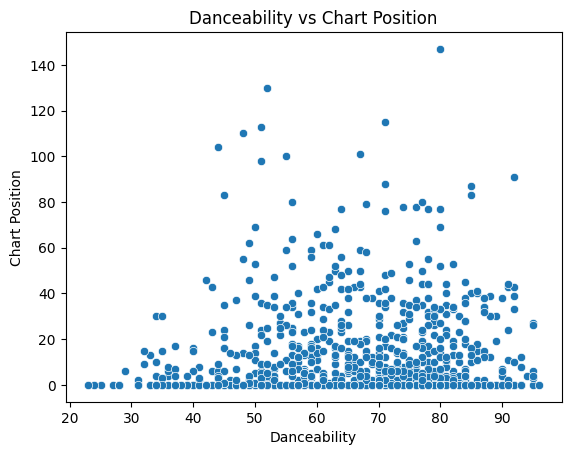

In [14]:
#Plot of danceability vs chart position
sns.scatterplot(x='danceability_%', y='in_spotify_charts', data=data)
plt.title('Danceability vs Chart Position')
plt.xlabel('Danceability')
plt.ylabel('Chart Position')
plt.show()

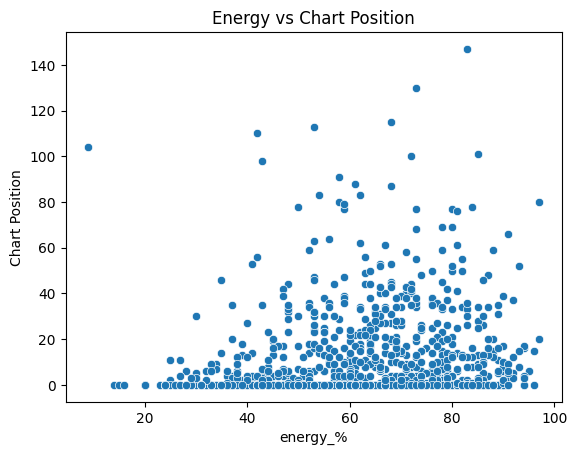

In [15]:
#Plot of energy vs chart position
sns.scatterplot(x='energy_%', y='in_spotify_charts', data=data)
plt.title('Energy vs Chart Position')
plt.xlabel('energy_%')
plt.ylabel('Chart Position')
plt.show()

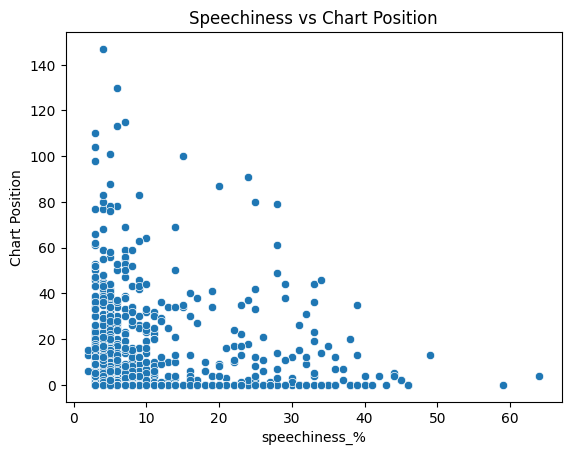

In [16]:
#Plot of speechness vs chart position
sns.scatterplot(x='speechiness_%', y='in_spotify_charts', data=data)
plt.title('Speechiness vs Chart Position')
plt.xlabel('speechiness_%')
plt.ylabel('Chart Position')
plt.show()

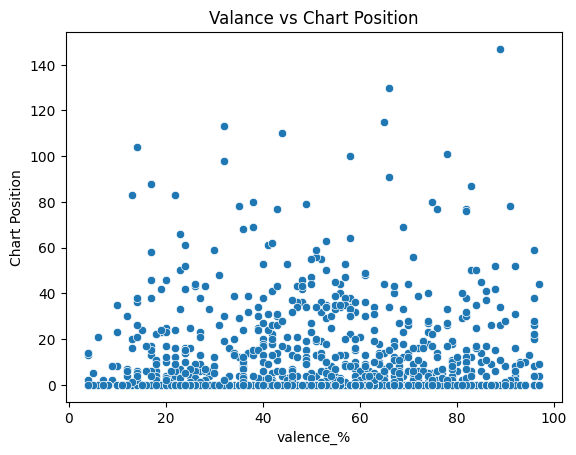

In [17]:
#Plot of valence_% vs chart position
sns.scatterplot(x='valence_%', y='in_spotify_charts', data=data)
plt.title('Valance vs Chart Position')
plt.xlabel('valence_%')
plt.ylabel('Chart Position')
plt.show()

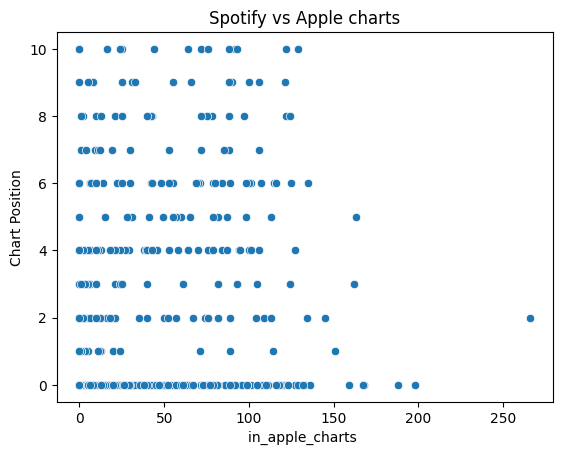

In [18]:
top_chart = data[data['in_spotify_charts'] <= 10]

sns.scatterplot(x='in_apple_charts', y='in_spotify_charts', data=top_chart)
plt.title('Spotify vs Apple charts')
plt.xlabel('in_apple_charts ')
plt.ylabel('Chart Position')
plt.show()

In [19]:
top_chart.info()


<class 'pandas.core.frame.DataFrame'>
Index: 641 entries, 82 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            641 non-null    object
 1   artist(s)_name        641 non-null    object
 2   artist_count          641 non-null    int64 
 3   released_year         641 non-null    int64 
 4   released_month        641 non-null    int64 
 5   released_day          641 non-null    int64 
 6   in_spotify_playlists  641 non-null    int64 
 7   in_spotify_charts     641 non-null    int64 
 8   streams               641 non-null    object
 9   in_apple_playlists    641 non-null    int64 
 10  in_apple_charts       641 non-null    int64 
 11  in_deezer_playlists   641 non-null    object
 12  in_deezer_charts      641 non-null    int64 
 13  in_shazam_charts      607 non-null    object
 14  bpm                   641 non-null    int64 
 15  key                   641 non-null    object

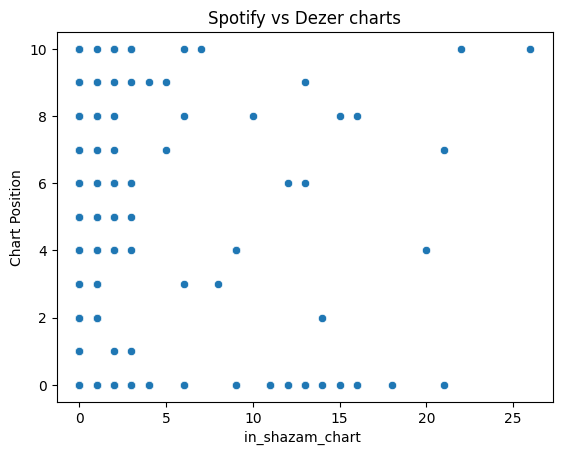

In [20]:
sns.scatterplot(x='in_deezer_charts', y='in_spotify_charts', data=top_chart)
plt.title('Spotify vs Dezer charts')
plt.xlabel('in_shazam_chart ')
plt.ylabel('Chart Position')
plt.show()

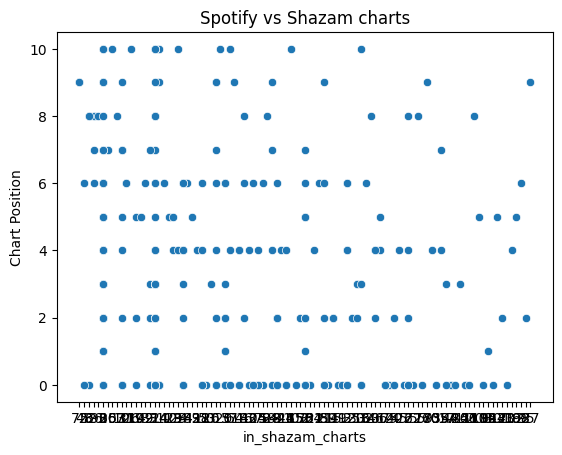

In [21]:
sns.scatterplot(x='in_shazam_charts', y='in_spotify_charts', data=top_chart)
plt.title('Spotify vs Shazam charts')
plt.xlabel('in_shazam_charts')
plt.ylabel('Chart Position')
plt.show()